# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

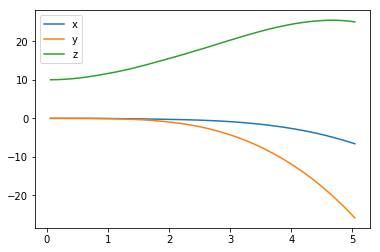

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

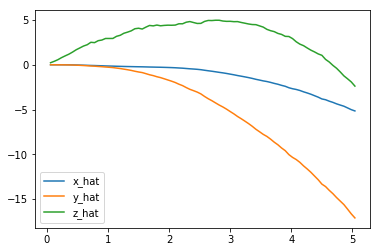

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

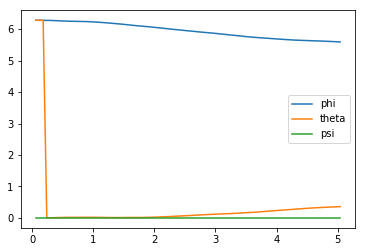

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

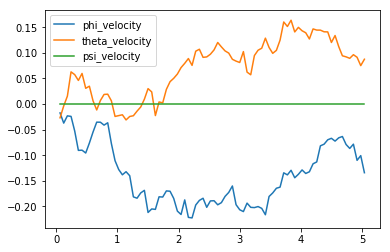

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

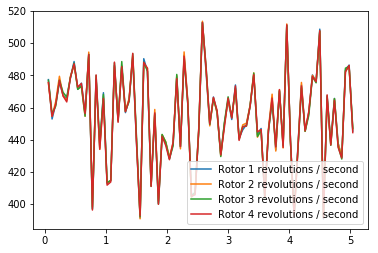

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[ -6.58948132 -25.83362509  25.03101387   5.59242726   0.35871897   0.        ]
[ -5.15668915 -17.10798836  -2.38094976]
[-0.13415837  0.08753114  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [9]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score =  -0.797 (best =   0.014), noise_scale = 3.2555

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [10]:
%reload_ext autoreload
%autoreload 2

import numpy as np
from agents.agent import DDPGAgent
import task
import csv
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [14]:
runtime = 10
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
target_pos = np.array([0., 0., 100.])

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime, target_pos=target_pos)
agent = DDPGAgent(task)

num_episodes = 300
best_total_reward = -np.inf
best_stat = None
rewards = []
best_results = None

labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']

# Run the simulation, and save the results.
for i_episode in range(1, num_episodes+1):
    
    done = False
    state = agent.reset_episode()    
    total_reward = 0.0
    
    results_episode = {x : [] for x in labels}
        
    while True:
        action = agent.act(state)
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        total_reward += reward

        result = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(action)
        
        for ii in range(len(labels)):
            results_episode[labels[ii]].append(result[ii])

        if done:
            rewards.append(total_reward)
            
            if total_reward >= best_total_reward:
                best_total_reward = total_reward
                best_results = results_episode 
            
            break
            
    print(str(i_episode) + ': ' + str(total_reward))
    
print("Training finished")

1: -1724.92795401
2: -1724.67797514
3: -1724.84270261
4: -1968.57474201
5: -2114.80604916
6: -2113.16190086
7: -2114.75282375
8: -2114.40547147
9: -2114.53043843
10: -2114.55090747
11: -2114.652705
12: -2114.65965024
13: -1949.60510225
14: -1779.29152798
15: -1779.29153275
16: -1779.29152974
17: -1779.29152526
18: -1779.29153069
19: -1779.29153082
20: -1779.29153025
21: -1779.29153053
22: -1779.29139832
23: -1950.78477945
24: -2114.58102394
25: -2114.66131284
26: -2114.74341534
27: -2114.69646547
28: -2114.38936051
29: -2114.71455939
30: -2114.80771872
31: -2115.11154278
32: -9054.45567463
33: -9182.6401346
34: -9951.3381121
35: -12368.5048807
36: -2369.40003179
37: -2377.0208069
38: -2373.71238536
39: -2371.45071347
40: -2365.89814354
41: -2365.69480999
42: -2365.01293472
43: -2368.19307592
44: -2373.02814801
45: -2372.0287241
46: -2369.40587701
47: -2365.80389028
48: -2371.30476612
49: -2371.0163276
50: -2373.79535768
51: -2370.42416472
52: -2374.53014049
53: -2371.16842752
54: -2367

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

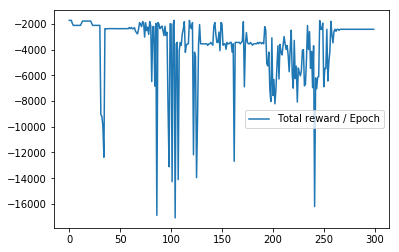

In [16]:
plt.plot(rewards, label='Total reward / Epoch');
plt.legend();

# Position

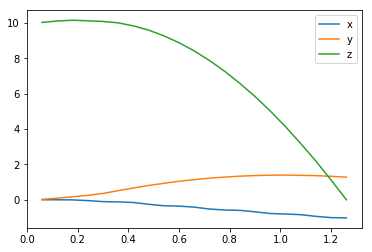

In [17]:
plt.plot(best_results['time'], best_results['x'], label='x');
plt.plot(best_results['time'], best_results['y'], label='y');
plt.plot(best_results['time'], best_results['z'], label='z');
plt.legend();

# Rotor speed

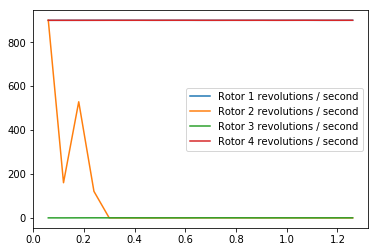

In [18]:
plt.plot(best_results['time'], best_results['rotor_speed1'], label='Rotor 1 revolutions / second');
plt.plot(best_results['time'], best_results['rotor_speed2'], label='Rotor 2 revolutions / second');
plt.plot(best_results['time'], best_results['rotor_speed3'], label='Rotor 3 revolutions / second');
plt.plot(best_results['time'], best_results['rotor_speed4'], label='Rotor 4 revolutions / second');
plt.legend();

# Rotation

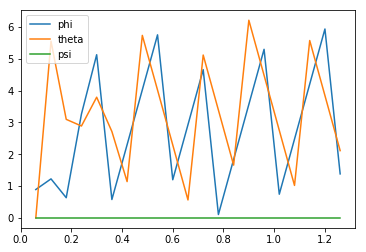

In [19]:
plt.plot(best_results['time'], best_results['phi'], label='phi');
plt.plot(best_results['time'], best_results['theta'], label='theta');
plt.plot(best_results['time'], best_results['psi'], label='psi');
plt.legend();

# Velocity

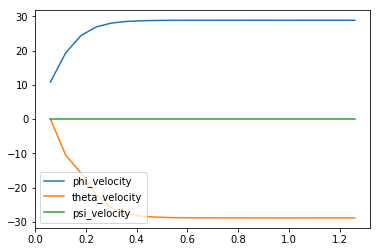

In [20]:
plt.plot(best_results['time'], best_results['phi_velocity'], label='phi_velocity');
plt.plot(best_results['time'], best_results['theta_velocity'], label='theta_velocity');
plt.plot(best_results['time'], best_results['psi_velocity'], label='psi_velocity');
plt.legend();

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:

I tried to teach my quadcopter a simple takeoff task. The quadcopter has to take off from position (0,0,10) and then hover at (0,0,100).

It took me a while to figure out that the (-,-,0) is a stop condition in the PhysicsSim environment. Therefore, the position (-,-,0) shouldn't be used as a start position for the quadcopter.

I played around with many different reward functions. Finally, I decided to use a reward function tries to stabilize the flight by penalizing large euler angles. Furthermore, penalize the agent by it's distance from the target. This forces the quadrocopter to move closer to the target. At every step I add a constant reward of 300. This rewards the agent for not crashing. Once the quadcopter is close to the target, I add an additional reward of 10000. This helps to force the quadcopter to fly close to the target.

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:

I used the DDPG algorithm as there was lots of resources available for it. Included was a Ornstein-Uhlenbeck process to aid exploration. Initially, I thought adding further layers to the actor / critic might help improving the overall performance. However, it turned out that increasing the network size doesn't add much value. Therefore, I decided to stick to the the initial architecture and tweaking the reward function.

**Actor:**
32-64-32 layer network with a **RELU** activation after each layer followed by a final Dense layer with a sigmoid action at the output. The output then gets scaled to the required range by means of a lambda layer.
The adam optimizer is used for optimization.

**Critic:**
Two-path network. The first path estimates the state and the second path the action. Each path comprises of two 32-64 node layers. Both paths are then added up and passed through a final **RELU** action layer. Since we have multiple neurons in the output layer we add another densely connected layer (one output neuron) that represents the Q-value.
The adam optimizer is used for optimization.

**Hyperparameters:**
I tried different hyperparameters settings, but none of the changes had much effect on the agent's performance. Reducing the discount factor gamma causes the agent to focus more on short-term goals. Obviously, the decreasing the gamma causes the agent's likelihood to crash which intuitively makes sense. Increasing tau adds more volatility to the network's weight changes. The smaller tau is, the more we put trust in the target weight.
I finally added up with the following parameters: theta=0.15, sigma=0.1, gamma=0.99, tau=0.01

I've choosen a batch size of 64 and a replay buffer capacity of 100000 for training.

All in all it only the reward function had a significant impact on the agent's performance. Tweaking the other hyperparameters does not seem to improve the performance significantly.

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

- Learning is really challenging. It tends to suddenly shoot up, continues to perform well for a while and then can just drop off. I reduced the exploration paramenter to see if that effected it but it didn't seem to make much difference. The quadcopter flying-task seems to be very hard to learn. The four rotor speeds have to be well-aligned to reach the target in a satisfactory way. We not only want to reach the quadcopter to reach the target, we also want to ensure a stable flight curve without strong rotations of the quadcopter. Since tiny adjustments to the rotor speeds already have a huge impact on the flight curve it's extremely hard to learn.

- The learning curve was kind of both. Initially, I tried to implement the agent / critic setup myself, but I then got stuck and used the provided code. It took me a while to figure out that (-,-,0) is not a valid position to start the quadcopter. Finally, once I noticed that the reward function is the key to achieve acceptable performance I was able to develop an agent that "hit" in an acceptable way.

- The highest rewards I achieved were around 100000. The diagrams above show that the quadcopter learned to get close to the target. Additionally, I have noticed that both rotors 1 & 4 are not used at all. In practice, we therefore might have to add some additional constraint on the rotor speed forcing the agent to use all rotors for flying

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:

- The project is such a significant leap from the others I've worked on that I found this really challenging. There are so many different components and parameters. I really struggled with setting the reward function properly and so tried to keep it simple

- As already mentioned it's really surprising to me that only rotor 2 and 3 are used and it's still feasible for the quadcopter to reach the final target state.